### Inverse Kinematics by MLP

## epoch = 100

# depth 2 and 64 neurons each

Epoch 1/100


c:\Users\haris\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/stepstep - loss: 0.8
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.8346 - val_loss: 0.1699 - train_rmse: 0.4257 - test_rmse: 0.4356
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/stepstep - loss: 0.178
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 0.1783 - val_loss: 0.1448 - train_rmse: 0.3872 - test_rmse: 0.3827
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/stepstep - loss: 0.123
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1234 - val_loss: 0.1581 - train_rmse: 0.3969 - test_rmse: 0.4132
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/stepstep - loss: 0.117
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 0.1171 - val_loss: 0.0931 - train_rmse: 0.3218 - test_rmse: 0.3075
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/stepstep - loss: 0.107
14/14 ━━━━━━━━━━━━━

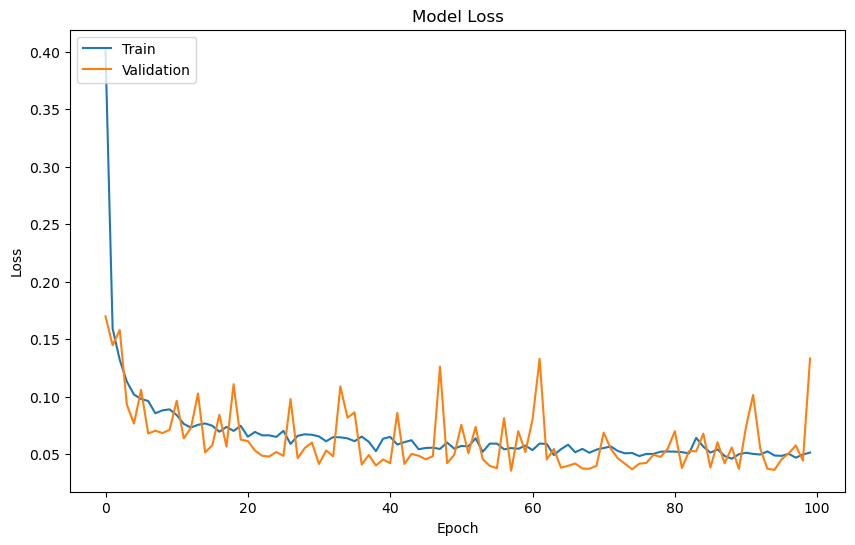

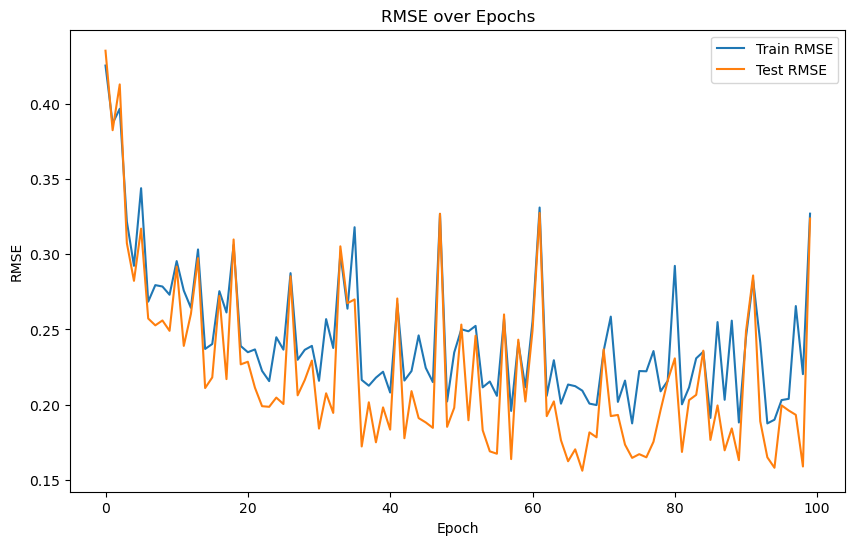

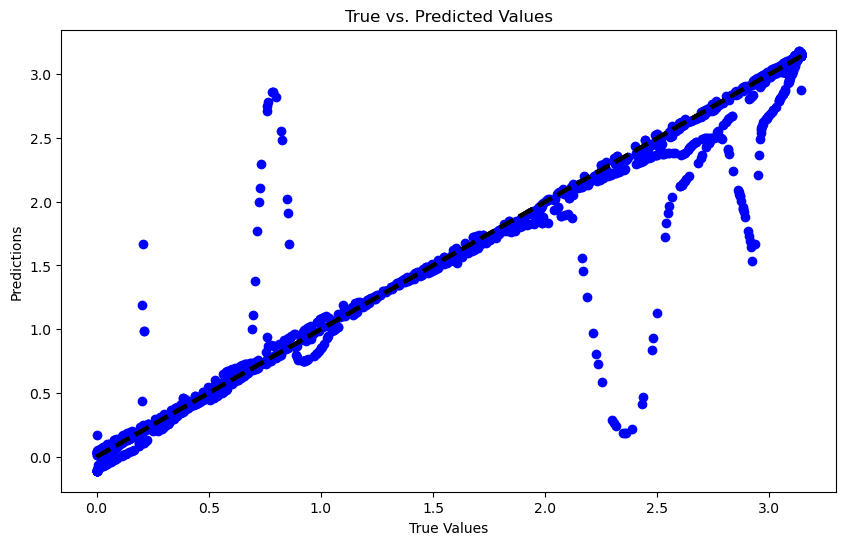

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import time

data = pd.read_csv('RRR_data2.csv')

X = data[['px', 'py', 'pz']]
y = data[['theta_1', 'theta_2', 'theta_3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3)
])

model.compile(optimizer='adam', loss='mean_squared_error')

class RMSECallback(keras.callbacks.Callback):
    def __init__(self, X_test_scaled, y_test):
        super().__init__()
        self.X_test_scaled = X_test_scaled
        self.y_test = y_test
        self.train_rmse = []
        self.test_rmse = []
    
    def on_epoch_end(self, epoch, logs=None):
        y_train_pred = self.model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        self.train_rmse.append(train_rmse)
        
        y_test_pred = self.model.predict(self.X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(self.y_test, y_test_pred))
        self.test_rmse.append(test_rmse)
        
        logs['train_rmse'] = train_rmse
        logs['test_rmse'] = test_rmse

rmse_callback = RMSECallback(X_test_scaled, y_test)

start_time = time.time()
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=1, verbose=1, validation_split=0.2, callbacks=[rmse_callback])
training_time = time.time() - start_time

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=1)

print(f'Test Loss: {loss}')

# Evaluate R^2 Score
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Evaluate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the training time
print(f'Training Time: {training_time} seconds')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting RMSE over epochs for both train and test sets
plt.figure(figsize=(10, 6))
plt.plot(rmse_callback.train_rmse, label='Train RMSE')
plt.plot(rmse_callback.test_rmse, label='Test RMSE')
plt.title('RMSE over Epochs')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plotting predicted vs. true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()


# depth 3 and 128 neurons each

Epoch 1/100


c:\Users\haris\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step /step - loss: 0.6
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6442 - val_loss: 0.1210 - train_rmse: 0.3632 - test_rmse: 0.3649
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/stepstep - loss: 0.124
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1241 - val_loss: 0.1052 - train_rmse: 0.3421 - test_rmse: 0.3209
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/stepstep - loss: 0.136
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1370 - val_loss: 0.1357 - train_rmse: 0.3733 - test_rmse: 0.3775
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/stepstep - loss: 0.120
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1204 - val_loss: 0.0925 - train_rmse: 0.3052 - test_rmse: 0.3000
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/stepstep - loss: 0.095
14/14 ━━━━━━━━━━━━━━━━━

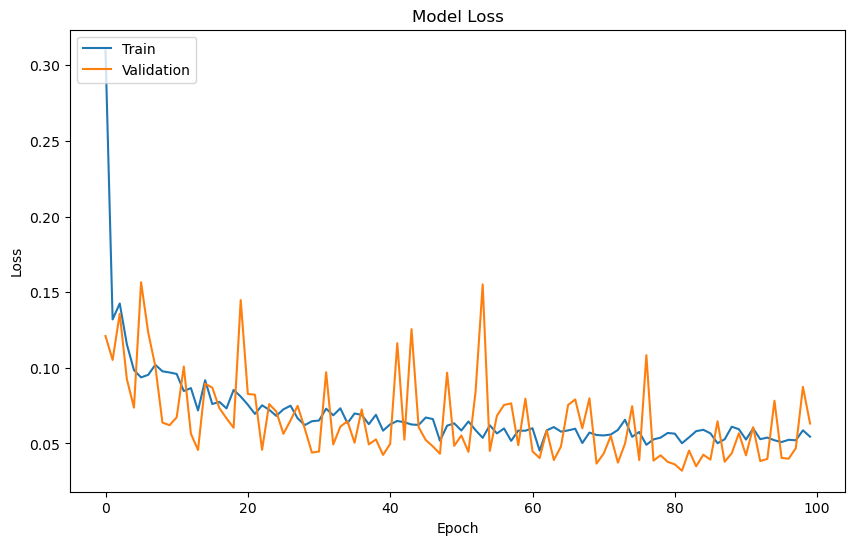

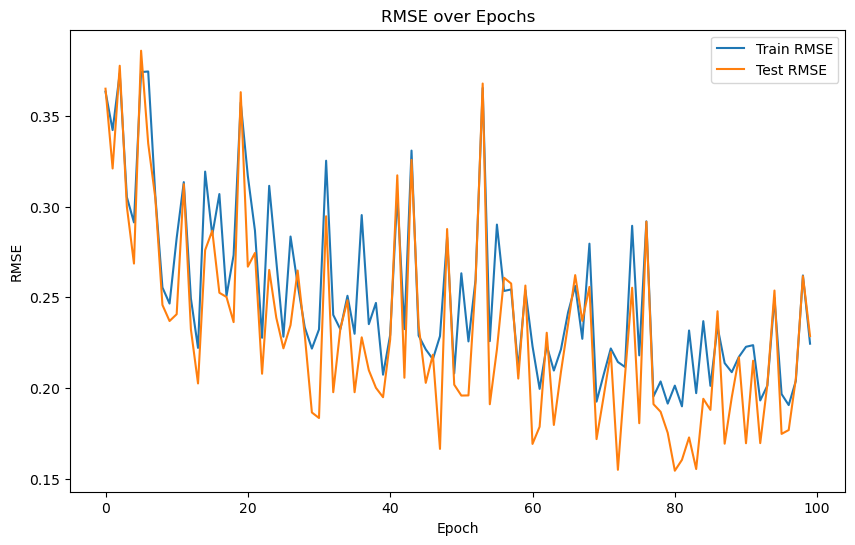

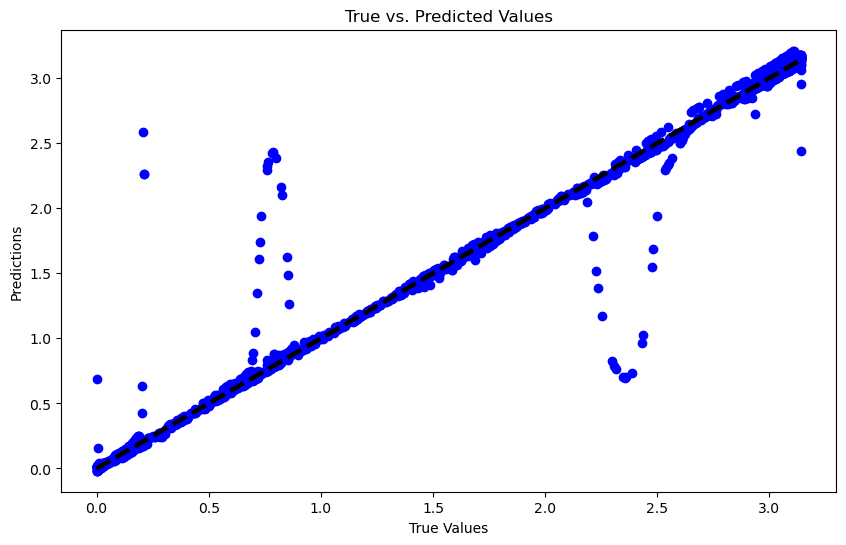

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import time

data = pd.read_csv('RRR_data2.csv')

X = data[['px', 'py', 'pz']]
y = data[['theta_1', 'theta_2', 'theta_3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(3,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3)
])

model.compile(optimizer='adam', loss='mean_squared_error')

class RMSECallback(keras.callbacks.Callback):
    def __init__(self, X_test_scaled, y_test):
        super().__init__()
        self.X_test_scaled = X_test_scaled
        self.y_test = y_test
        self.train_rmse = []
        self.test_rmse = []
    
    def on_epoch_end(self, epoch, logs=None):
        y_train_pred = self.model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        self.train_rmse.append(train_rmse)
        
        y_test_pred = self.model.predict(self.X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(self.y_test, y_test_pred))
        self.test_rmse.append(test_rmse)
        
        logs['train_rmse'] = train_rmse
        logs['test_rmse'] = test_rmse

rmse_callback = RMSECallback(X_test_scaled, y_test)

start_time = time.time()
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=1, verbose=1, validation_split=0.2, callbacks=[rmse_callback])
training_time = time.time() - start_time

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=1)

print(f'Test Loss: {loss}')

# Evaluate R^2 Score
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Evaluate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the training time
print(f'Training Time: {training_time} seconds')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting RMSE over epochs for both train and test sets
plt.figure(figsize=(10, 6))
plt.plot(rmse_callback.train_rmse, label='Train RMSE')
plt.plot(rmse_callback.test_rmse, label='Test RMSE')
plt.title('RMSE over Epochs')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plotting predicted vs. true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()


# depth 4  256 neurons

Epoch 1/100


c:\Users\haris\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step tep - loss: 0.4
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4952 - val_loss: 0.1127 - train_rmse: 0.3567 - test_rmse: 0.3537
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/stepep - loss: 0.145
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1457 - val_loss: 0.2036 - train_rmse: 0.4457 - test_rmse: 0.4642
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/stepep - loss: 0.147
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1471 - val_loss: 0.1407 - train_rmse: 0.3802 - test_rmse: 0.3757
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/stepep - loss: 0.129
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1290 - val_loss: 0.1184 - train_rmse: 0.3530 - test_rmse: 0.3425
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/stepep - loss: 0.122
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 924us

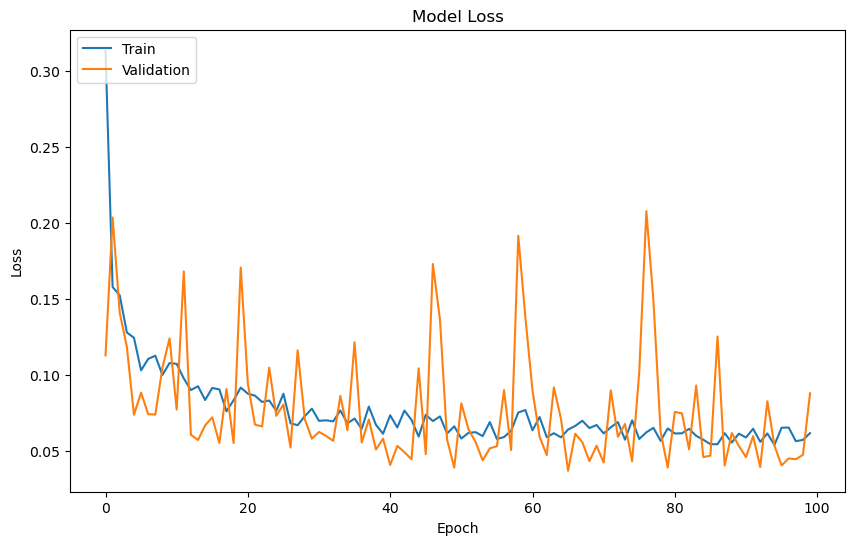

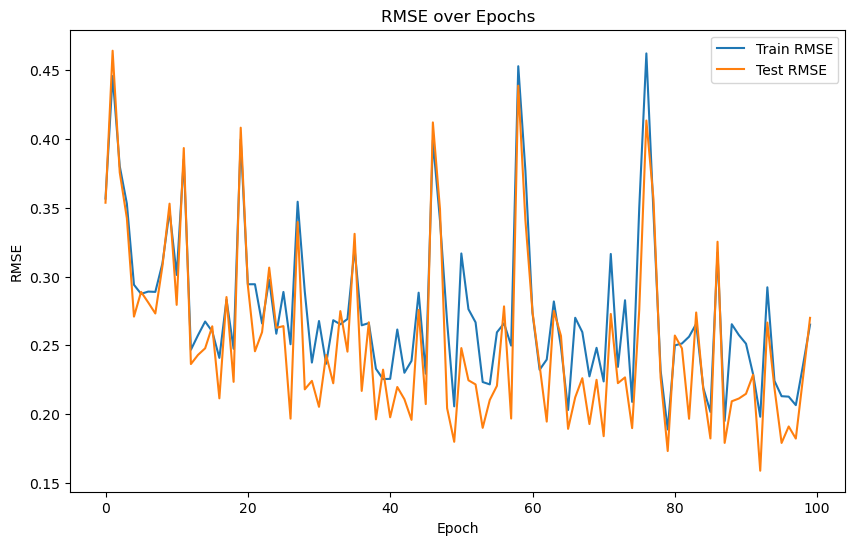

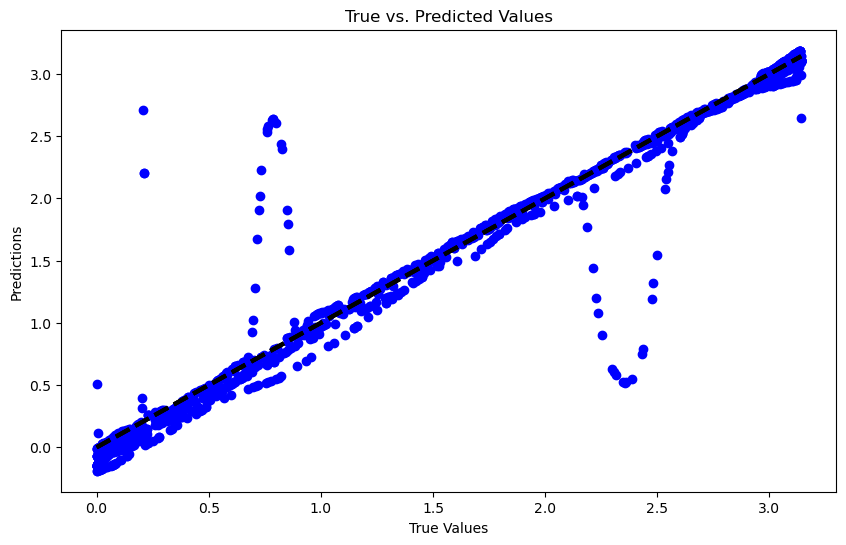

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import time

data = pd.read_csv('RRR_data2.csv')

X = data[['px', 'py', 'pz']]
y = data[['theta_1', 'theta_2', 'theta_3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(3,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(3)
])

model.compile(optimizer='adam', loss='mean_squared_error')

class RMSECallback(keras.callbacks.Callback):
    def __init__(self, X_test_scaled, y_test):
        super().__init__()
        self.X_test_scaled = X_test_scaled
        self.y_test = y_test
        self.train_rmse = []
        self.test_rmse = []
    
    def on_epoch_end(self, epoch, logs=None):
        y_train_pred = self.model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        self.train_rmse.append(train_rmse)
        
        y_test_pred = self.model.predict(self.X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(self.y_test, y_test_pred))
        self.test_rmse.append(test_rmse)
        
        logs['train_rmse'] = train_rmse
        logs['test_rmse'] = test_rmse

rmse_callback = RMSECallback(X_test_scaled, y_test)

start_time = time.time()
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=1, verbose=1, validation_split=0.2, callbacks=[rmse_callback])
training_time = time.time() - start_time

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=1)

print(f'Test Loss: {loss}')

# Evaluate R^2 Score
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Evaluate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the training time
print(f'Training Time: {training_time} seconds')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting RMSE over epochs for both train and test sets
plt.figure(figsize=(10, 6))
plt.plot(rmse_callback.train_rmse, label='Train RMSE')
plt.plot(rmse_callback.test_rmse, label='Test RMSE')
plt.title('RMSE over Epochs')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plotting predicted vs. true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()
